In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras import regularizers

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

In [19]:
input_img = Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = Dense(1024, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [20]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(input_layer,output_layer,optimizer,epochs,batch_size):
    autoencoder = Model(input_layer,output_layer)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer")
    hist = autoencoder.fit(x_train_noisy,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test_noisy,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

With adam optimizer
Epoch 1/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0953 - mean_squared_error: 0.0092 - val_loss: 0.1138 - val_mean_squared_error: 0.0150
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0949 - mean_squared_error: 0.0091 - val_loss: 0.1142 - val_mean_squared_error: 0.0150
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0947 - mean_squared_error: 0.0091 - val_loss: 0.1145 - val_mean_squared_error: 0.0151
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0945 - mean_squared_error: 0.0090 - val_loss: 0.1148 - val_mean_squared_error: 0.0152
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0943 - mean_squared_error: 0.0089 - val_loss: 0.1148 - val_mean_squared_error: 0.0152
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0941 - mean_squared_error: 0.0089 - val_loss: 0.1152 - val_mean_squared_error: 0.0153


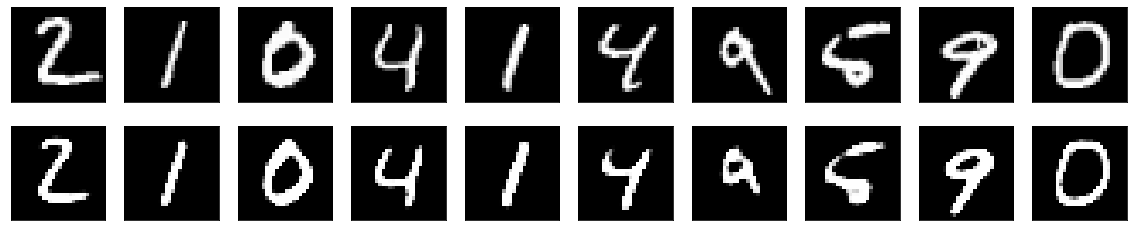

With rmsprop optimizer
Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.0948 - mean_squared_error: 0.0092 - val_loss: 0.1193 - val_mean_squared_error: 0.0166
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0944 - mean_squared_error: 0.0091 - val_loss: 0.1189 - val_mean_squared_error: 0.0164
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0942 - mean_squared_error: 0.0091 - val_loss: 0.1185 - val_mean_squared_error: 0.0163
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0941 - mean_squared_error: 0.0090 - val_loss: 0.1179 - val_mean_squared_error: 0.0162
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0940 - mean_squared_error: 0.0090 - val_loss: 0.1200 - val_mean_squared_error: 0.0167
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0939 - mean_squared_error: 0.0090 - val_loss: 0.1190 - val_mean_squared_error: 

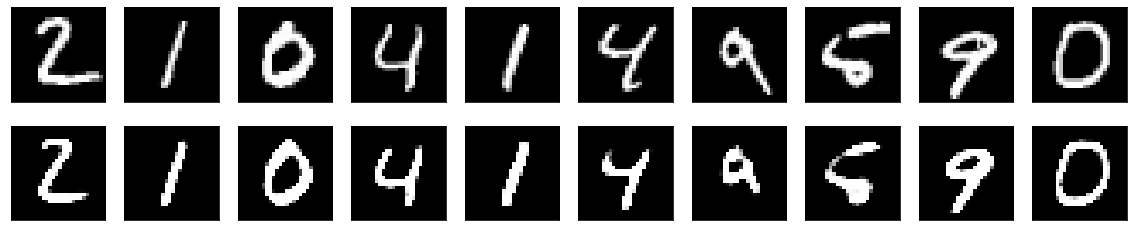

With adadelta optimizer
Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0921 - mean_squared_error: 0.0085 - val_loss: 0.1208 - val_mean_squared_error: 0.0168
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0920 - mean_squared_error: 0.0085 - val_loss: 0.1206 - val_mean_squared_error: 0.0168
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0919 - mean_squared_error: 0.0084 - val_loss: 0.1205 - val_mean_squared_error: 0.0167
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0918 - mean_squared_error: 0.0084 - val_loss: 0.1204 - val_mean_squared_error: 0.0167
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0917 - mean_squared_error: 0.0084 - val_loss: 0.1203 - val_mean_squared_error: 0.0167
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0916 - mean_squared_error: 0.0083 - val_loss: 0.1202 - val_mean_squared_error: 0.

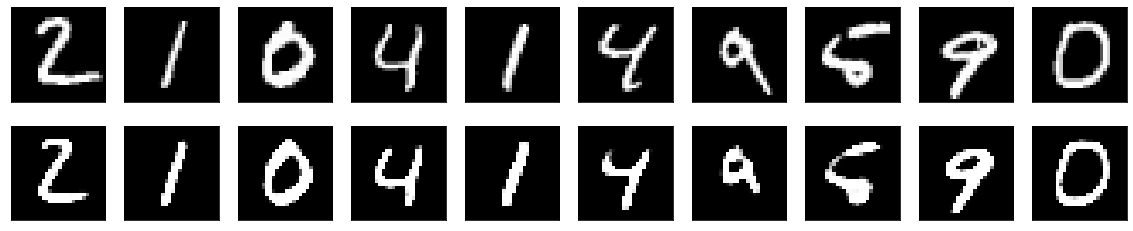

With adagrad optimizer
Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0912 - mean_squared_error: 0.0082 - val_loss: 0.1197 - val_mean_squared_error: 0.0165
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0910 - mean_squared_error: 0.0081 - val_loss: 0.1196 - val_mean_squared_error: 0.0165
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0909 - mean_squared_error: 0.0081 - val_loss: 0.1195 - val_mean_squared_error: 0.0164
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0908 - mean_squared_error: 0.0081 - val_loss: 0.1194 - val_mean_squared_error: 0.0164
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0908 - mean_squared_error: 0.0080 - val_loss: 0.1194 - val_mean_squared_error: 0.0164
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0907 - mean_squared_error: 0.0080 - val_loss: 0.1193 - val_mean_squared_error: 0.0164

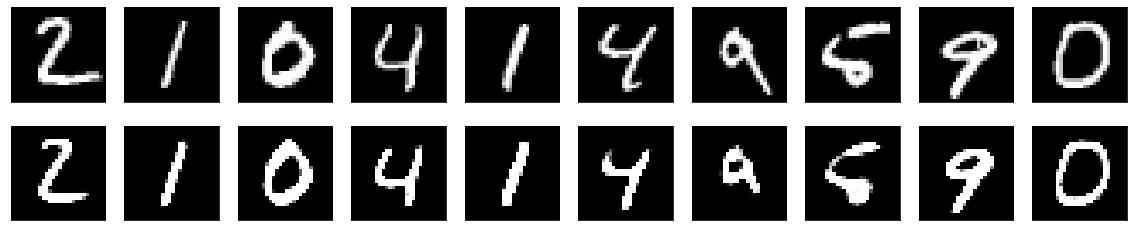

With nadam optimizer
Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.0926 - mean_squared_error: 0.0086 - val_loss: 0.1194 - val_mean_squared_error: 0.0165
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0921 - mean_squared_error: 0.0085 - val_loss: 0.1201 - val_mean_squared_error: 0.0166
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0919 - mean_squared_error: 0.0084 - val_loss: 0.1201 - val_mean_squared_error: 0.0166
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0918 - mean_squared_error: 0.0083 - val_loss: 0.1199 - val_mean_squared_error: 0.0166
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0916 - mean_squared_error: 0.0083 - val_loss: 0.1198 - val_mean_squared_error: 0.0166
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0915 - mean_squared_error: 0.0083 - val_loss: 0.1203 - val_mean_squared_error: 0.

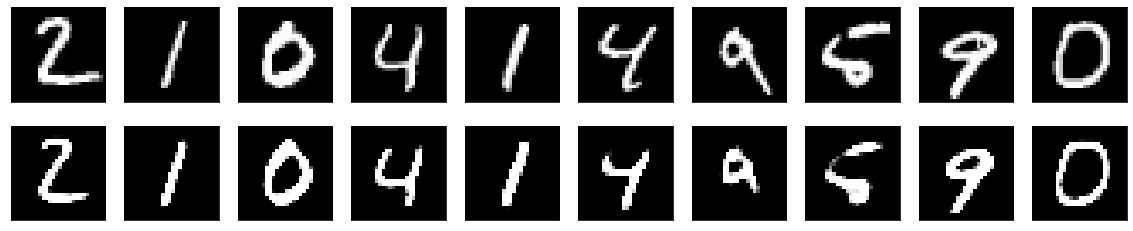

With sgd optimizer
Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.0894 - mean_squared_error: 0.0076 - val_loss: 0.1206 - val_mean_squared_error: 0.0168
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0892 - mean_squared_error: 0.0075 - val_loss: 0.1205 - val_mean_squared_error: 0.0168
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0891 - mean_squared_error: 0.0075 - val_loss: 0.1205 - val_mean_squared_error: 0.0167
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0890 - mean_squared_error: 0.0075 - val_loss: 0.1204 - val_mean_squared_error: 0.0167
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0889 - mean_squared_error: 0.0074 - val_loss: 0.1204 - val_mean_squared_error: 0.0167
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0889 - mean_squared_error: 0.0074 - val_loss: 0.1204 - val_mean_squared_error: 0.0167
Epo

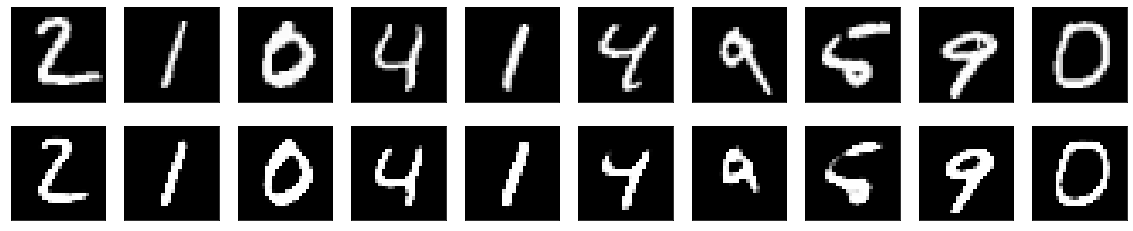

In [22]:
for i in ["adam","rmsprop","adadelta","adagrad","nadam","sgd"]:
        train_model(input_img,decoded,i,10,128)